In [1]:
from PIL import Image
import numpy as np
import os
from random import shuffle
import matplotlib.pyplot as plt


In [2]:
DIR = '../data/train/'

def image_stats():
    heights = []
    widths = []
    img_count = 0
    for img in os.listdir(DIR):
        path = os.path.join(DIR, img)
        if "DS_Store" not in path:
            data = np.array(Image.open(path))
            heights.append(data.shape[0])
            widths.append(data.shape[1])
            img_count += 1
    avg_height = sum(heights) / len(heights)
    avg_width = sum(widths) / len(widths)
    print("Average Height: " + str(avg_height))
    print("Max Height: " + str(max(heights)))
    print("Min Height: " + str(min(heights)))
    print('\n')
    print("Average Width: " + str(avg_width))
    print("Max Width: " + str(max(widths)))
    print("Min Width: " + str(min(widths)))

image_stats()

Average Height: 2505.8823529411766
Max Height: 3648
Min Height: 960


Average Width: 2280.470588235294
Max Width: 4000
Min Width: 960


In [3]:
classes=['taza','gorra','carrito','cubierto']
#classes=['taza','carrito','cubierto']

In [4]:
def label_img(name,clases):
    #print("----------------")
    arr=np.array([])
    word_label = name.split('_')[0]
    for l in classes:
        #print("label:",l," name:",name)
        if(word_label==l):
            arr=np.append(arr,[1])
            #print("label assigned:",l)
        else:
            arr=np.append(arr,[0])
    return arr

In [5]:
IMG_SIZE = 300

def load_training_data(classes):
    train_data = []
    for img in os.listdir(DIR):
        label = label_img(img,classes)
        path = os.path.join(DIR, img)
        if "DS_Store" not in path:
            img = Image.open(path)
            img = img.convert('L')
            img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
            train_data.append([np.array(img), label])
            
    shuffle(train_data)
    return train_data

In [6]:
train_data = load_training_data(classes)

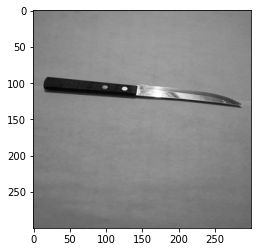

In [7]:
plt.imshow(train_data[0][0], cmap = 'gist_gray')

In [8]:
trainImages = np.array([i[0] for i in train_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
trainLabels = np.array([i[1] for i in train_data])
print(trainLabels)

[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0.

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization
import numpy as np

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(4, activation = 'softmax'))
#model.add(Dense(3, activation = 'softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 149, 149, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 73, 73, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 96)        5

In [12]:
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.SGD(lr=0.01, nesterov=True), metrics = ['accuracy'])

In [13]:
history=model.fit(trainImages, trainLabels, batch_size = 1, epochs = 15, verbose = 1)

Epoch 1/15
85/85 [==============================] - 9s 98ms/step - loss: 1.7179 - accuracy: 0.5132
Epoch 2/15
85/85 [==============================] - 8s 99ms/step - loss: 0.2136 - accuracy: 0.9463
Epoch 3/15
85/85 [==============================] - 8s 98ms/step - loss: 0.0527 - accuracy: 0.9871
Epoch 4/15
85/85 [==============================] - 8s 94ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 5/15
85/85 [==============================] - 8s 93ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 6/15
85/85 [==============================] - 8s 100ms/step - loss: 0.0150 - accuracy: 0.9909
Epoch 7/15
85/85 [==============================] - 8s 96ms/step - loss: 0.0079 - accuracy: 1.0000
Epoch 8/15
85/85 [==============================] - 8s 96ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 9/15
85/85 [==============================] - 8s 97ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 10/15
85/85 [==============================] - 8s 94ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 11

In [14]:
TEST_DIR = '../data/test/'
def load_test_data(classes):
    test_data = []
    for img in os.listdir(TEST_DIR):
        label = label_img(img,classes)
        path = os.path.join(TEST_DIR, img)
        if "DS_Store" not in path:
            img = Image.open(path)
            img = img.convert('L')
            img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
            test_data.append([np.array(img), label])
    shuffle(test_data)
    return test_data


test_data = load_test_data(classes)


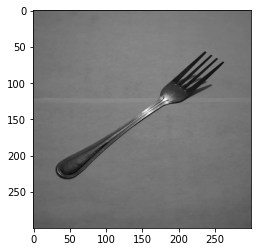

In [20]:
plt.imshow(test_data[2][0], cmap = 'gist_gray')

In [21]:
testImages = np.array([i[0] for i in test_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
testLabels = np.array([i[1] for i in test_data])

loss, acc = model.evaluate(testImages, testLabels, verbose = 0)
print("Accuracy:",acc * 100, " - Loss:",loss)
#print(model.predict(testImages))
predict_arr=np.round(model.predict(testImages))
print(predict_arr)
print("El objeto es un(a):",classes[np.where(predict_arr[12]==1.)[0][0]].upper())

Accuracy: 100.0  - Loss: 0.07946917414665222
[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
El objeto es un(a): TAZA


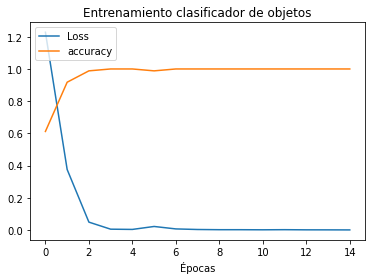

In [17]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label='accuracy')

plt.title('Entrenamiento clasificador de objetos')
plt.xlabel('Épocas')
plt.legend(loc="upper left")

plt.show()